# Heart Attack Analysis & Prediction 

<br>
<br>
<img src="images/heart-attack-patient.jpeg" alt="Drawing" style="width: 500px;"/>
<br>
<b>Author</b>: Juana Tavera

## Overview

### Business Problem
A health clinic in the Metro Atlanta area has called on Tavera Analytics to come up with model that is able to classify if a patient is at risk of having a heart attack or not based on certain features, in the hopes of reducing the workload of the staff.

### Dataset - Heart Attack Analysis & Prediction 
This dataset was found on Kaggle. Here is the direct [link](https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset).

In [38]:
#importing the necessary packages 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#reading in the data
heart_disease = pd.read_csv('data/heart.csv')

## Exploratory Data Analysis

In [39]:
display(heart_disease.head())
display(heart_disease.info())

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


None

This is a very simple dataset it only has 303 entries, 14 columns. No null values which is perfect for going straight into modeling which this tutorial is all about but we still want to explore our data a bit more.

From this dataset can see that although the dtypes of the columns are all numerical there are some columns that are considered to be categorical:
- `sex`
- `cp`: chest pain 
- `fbs`: fasting blood sugar
- `restecg`: resting electromagentic results
- `exng`: exercise induced angina
- `slp`: slope
- `thall`: thalassemia


In [40]:
#lets look at the value counts for the categorical variables
cat_heart_disease = heart_disease[['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'thall']]

for column, values in cat_heart_disease.iteritems():
    print(f'Column Name: {column}')
    print('Value counts: ')
    print(values.value_counts())
    print("")

Column Name: sex
Value counts: 
1    207
0     96
Name: sex, dtype: int64

Column Name: cp
Value counts: 
0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Column Name: fbs
Value counts: 
0    258
1     45
Name: fbs, dtype: int64

Column Name: restecg
Value counts: 
1    152
0    147
2      4
Name: restecg, dtype: int64

Column Name: exng
Value counts: 
0    204
1     99
Name: exng, dtype: int64

Column Name: slp
Value counts: 
2    142
1    140
0     21
Name: slp, dtype: int64

Column Name: thall
Value counts: 
2    166
3    117
1     18
0      2
Name: thall, dtype: int64



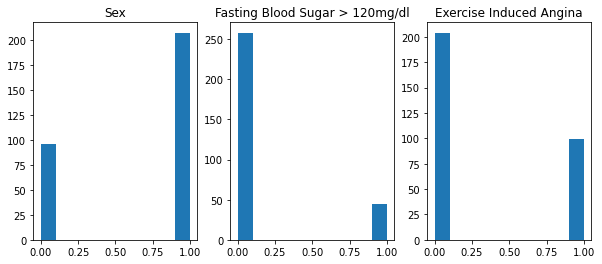

In [41]:
#displaying the binary categorical variables
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4))
axes[0].hist(heart_disease['sex'])
axes[1].hist(heart_disease['fbs'])
axes[2].hist(heart_disease['exng'])

axes[0].set_title("Sex")
axes[1].set_title("Fasting Blood Sugar > 120mg/dl")
axes[2].set_title("Exercise Induced Angina");

The binary categorical variables - Sex, Fasting Blood Sugar > 120mg/dl, Exercise Induced Angina 
- `sex`: 0 = male, 1 = female
- `fbg`: 0 = false, 1 = true
- `exng`: 0 = no, 1 = yes

More females in this dataset the male, fasting blood sugar > 120mg/dl is false more than true, and exercise induced angina is no more than yes. Angina is chest pain due to reduced blood flow to the heart muscles.

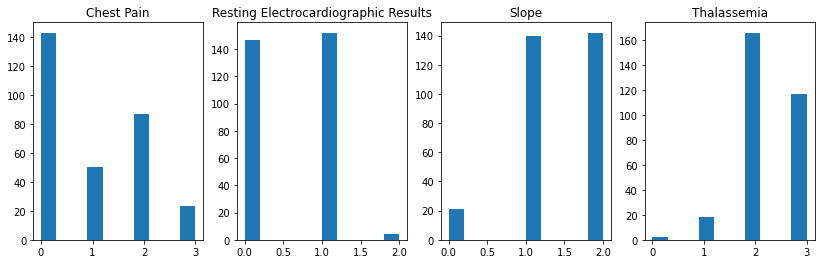

In [42]:
#displaying the categorical variables with more than 2 categories 
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(14, 4))
axes[0].hist(heart_disease['cp'])
axes[1].hist(heart_disease['restecg'])
axes[2].hist(heart_disease['slp'])
axes[3].hist(heart_disease['thall'])

axes[0].set_title("Chest Pain")
axes[1].set_title("Resting Electrocardiographic Results")
axes[2].set_title("Slope")
axes[3].set_title("Thalassemia");

Categorical Variables with more than 2 categories as well as the target variable - Chest Pain, Resting Electrogardiographic Results, Slope, Number of Major Vessels, Thalassemia, Target

- `cp`: 0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic
- `restecg`: 0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria
- `slp`: 0 = unsloping, 1 = flat, 2 = downsloping
- `thall`: 0 = null, 1 = fixed defect, 2 = normal, 3 = reversable defect

Typical angina for chest pain,  resting ecg is close between normal and having ST-T wave abnormality having more values, slope close between flat and downsloping with it having a bit more values, most common in Thalassemia is normal. Thalessemia is a genetic blood disorder that is characterized by a lower rate of hemoglobin than normal.

In [43]:
#now lets look at the numeric variables 
heart_disease_num = heart_disease[['age', 'trtbps', 'chol', 'thalachh', 'oldpeak', 'caa']]
heart_disease_num.describe()

,age,trtbps,chol,thalachh,oldpeak,caa
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604,0.729373
std,9.082101,17.538143,51.830751,22.905161,1.161075,1.022606
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,274.500000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,4.000000


- `age`: the mean is 54 with its max being 77, showing that older people are more likely to have heart disease (which makes sense)
- `trtbps`: resting blood pressure at a normal level is less than 120/80 mmHg. Here the mean is 131 with 75% of the data above the normal level. Its max being 200
- `chol`: cholesterol ranges for adults without heart disease at 
    - Normal: Less than 200 mg/dL
    - Borderline high: 200 to 239 mg/dL
    - High: At or above 240 mg/dL
- `chol` has a mean 246 which is high, and 75% of the values falls within 274 mg/dL.
- `thalachh`: maximum heart rate achieved, a normal resting heart rate for adults ranges from 60 to 100 beats per minute. Here the mean is 149 with a max of 202
- `oldpeak`:  ST depression induced by exercise relative to rest. Has a mean 1.16 and a max os 6.2
- `caa`: the number of major vessels most of the data falls with 0 or 1. 

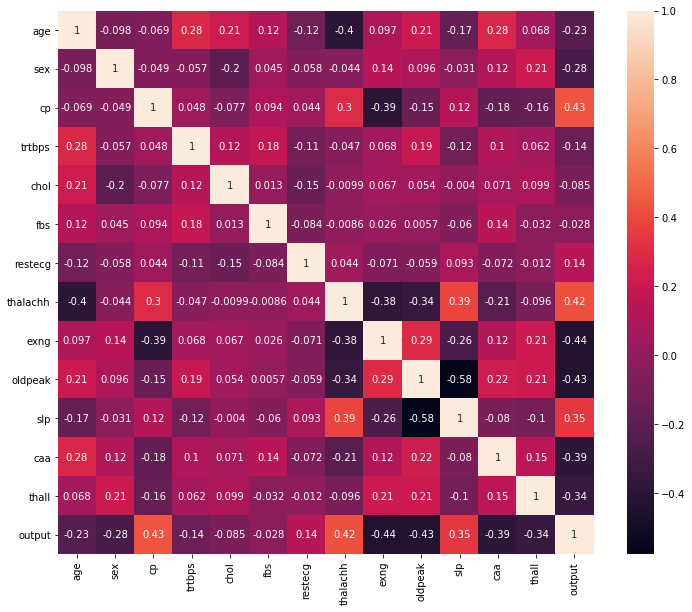

In [45]:
#plotting a correlation heatmap so see which variables we should use in our model
plt.figure(figsize=(12,10))
sns.heatmap(heart_disease.corr(), annot=True)
plt.show()

From this correlation heatmap can see:
- `chol`, `fbs`, `restecg`, `trtbps` do not have a very high correlation with predicting the likelihood of heart disease in a patient with fbs and chol being the bottom two. Might not be useful to have this is the model at all. 
- The variables that have the highest correlation with the output/target variable are `exng`, `cp`, `thalachh`, and `oldpeak`. 
- The other variables like `slp`, `caa`, `thall`, `sex`, and `age` are good contenders and can show us something significant as well. However `slp` and `oldpeak` have a high correlation values with one another which can raise issues with multicollinearity.
- Most positively correlated variables: `cp`, `thalachh`, `slp`
- Most negatively correlated variables: `exng`, `oldpeak`, `caa`, `thall` with `age` and `sex` coming behind

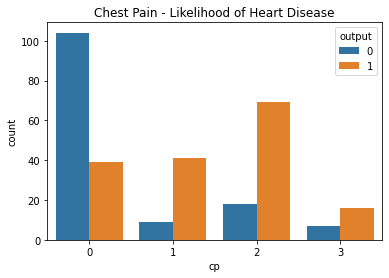

In [47]:
#plotting the relationship between the highest positively correlated values and the target 
sns.countplot(data= heart_disease, x='cp',hue='output')
plt.title('Chest Pain - Likelihood of Heart Disease');

With the patient has typical angina there are less likely to have heart disease, however when they have atypical angina or non-anginal pain there are more likely to have heart disease.

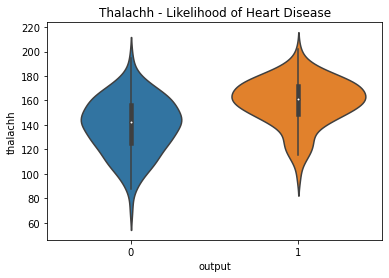

In [58]:
sns.violinplot(data= heart_disease, x='output', y='thalachh')
plt.title('Thalachh - Likelihood of Heart Disease');

In [60]:
no = heart_disease[heart_disease['output'] == 0]
no['thalachh'].describe()

count    138.000000
mean     139.101449
std       22.598782
min       71.000000
25%      125.000000
50%      142.000000
75%      156.000000
max      195.000000
Name: thalachh, dtype: float64

In [62]:
yes = heart_disease[heart_disease['output'] == 1]
yes['thalachh'].describe()

count    165.000000
mean     158.466667
std       19.174276
min       96.000000
25%      149.000000
50%      161.000000
75%      172.000000
max      202.000000
Name: thalachh, dtype: float64

<b>Thalachh</b>: maximum heart rate achieved, typical resting heart rate in adults is 60 - 100 beats per minute.

People who do not have heart disease have a larger range between the maximum heart rate achieved from 71 to 195 and most of the values were within 156 bpm. Their mean thalacch was at 139.1. However the people who do have heart disease the range was smaller but typically the thalachh was also higher from 96 to 202 and most of the values were within 172 bpm. The mean for people who did have heart disease was also higher at 158.47 bpm.

<img src="images/slope.png" alt="slope ST segment" style="width: 500px;"/>

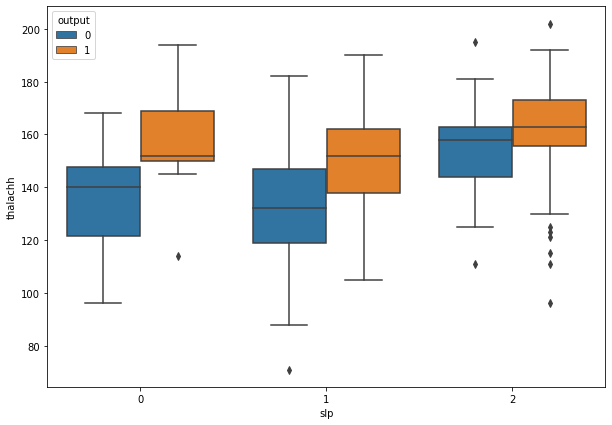

In [67]:
# now let's take a look at slp and thalachh together 
plt.figure(figsize=(10,7))
sns.boxplot(data=heart_disease, x='slp', y='thalachh', hue='output');

<b>Slope</b>: the slope of the peak exercise ST segment (it corresponds to the area from the end of the QRS complex to the beginning of the T wave)
- 0 = unsloping
- 1 = flat
- 2 = downsloping

On average people who do not have a heart disease their thalachh is lower compared to those who do have heart disease across the slopes. The people whose slope was downsloping tend to have a higher thalachh in general no matter if they have a heart disease or not. The person who had the highest thalachh at 220 and has heart disease also had a downsloping ST segment.

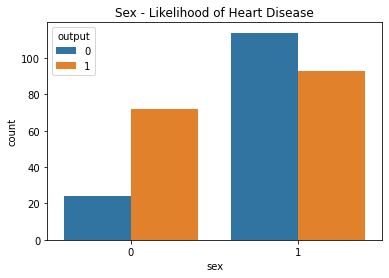

In [71]:
#plotting the relationship between sex and output
sns.countplot(data= heart_disease, x='sex',hue='output')
plt.title('Sex - Likelihood of Heart Disease');

In [76]:
yes['sex'].value_counts(normalize=True)

1    0.563636
0    0.436364
Name: sex, dtype: float64

In [77]:
no['sex'].value_counts(normalize=True)

1    0.826087
0    0.173913
Name: sex, dtype: float64

From this chart can see that there are more females in this dataset than males - 207 males compared to 96 males. However based on the chart and the value counts of sex males tend to have heart disease more than females with 83% of women and 17% of men not having heart disease. As well as 56% of women and 44% of men having heart disease.   